In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [10]:
log_path = Path("/home/neni/repos/thesis/logs_all")

BATCH_SIZE = 128
DATASET = "cifar10"
MACHINE="DGX"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_12tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_12tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    pids = [
          3343954, 3346647, 3350512, 3355774, # Naive
          # MPS
          3382485, 3384915, 3387893, 3391520, # Shared
          # Shared + MPS
          3362449, 3363317, 3364353, 3365758, # Naive DALI
          3397495, 3398302, 3399467, 3400815 # Shared DALI
    ]

    trace_pids = [
          3343954, 3346647, 3350512, 3355774, # Naive
          # MPS
          3382362, 3384843, 3387802, 3391399, # Shared
          # Shared + MPS
          3362449, 3363317, 3364353, 3365758, # Naive DALI
          3397451, 3398240, 3399391, 3400726, # Shared DALI
    ]
if DATASET == "imagenet_10pct":
      pids = [
            915737, 919495, 926109, 935866, #948533, 963989, 981972, # Naive
            # MPS
            1002965, 1006259, 1011751, 1019405, # Shared
            # Shared + MPS
            1028839, 1030833, 1033074, 1036187, # Naive DALI
            1040198, 1041516, 1043715, 1046698, # Shared DALI
      ]

      trace_pids = [
            915737, 919495, 926109, 935866, #948533, 963989, 981972, # Naive
            # MPS
            1002900, 1006194, 1011675, 1019251, # Shared
            # Shared + MPS
            1028839, 1030833, 1033074, 1036187, # Naive DALI
            1040115, 1041437, 1043662, 1046573, # Shared DALI
      ]
if DATASET == "cifar10" and BATCH_SIZE == 128:
      pids = [
            2865667, 2868128, 2871753, 2876257, 2882164, 2889160, 2897317, 2906726, # Naive
            3135012, 3137702, 3141364, 3145897, 3151423, 3157948, 3165695, 3174500, # MPS
            2917286, 2919583, 2921885, 2924412, 2927405, 2930530, 2934145, 2938000, # Shared
            3184515, 3186744, 3189078, 3191568, 3193935, 3196523, 3199396, 3202478 # Shared MPS
      ]
      trace_pids = [
            2865667, 2868128, 2871753, 2876257, 2882164, 2889160, 2897317, 2906726, # Naive
            3135012, 3137702, 3141364, 3145897, 3151423, 3157948, 3165695, 3174500, # MPS
            2917138, 2919512, 2921679, 2924286, 2927279, 2930369, 2934024, 2937923, # Shared
            3184397, 3186595, 3188907, 3191417, 3193846, 3196334, 3199270, 3202141, # Shared MPS
      ]
if DATASET == "cifar10" and BATCH_SIZE == 256:
      pids = [
            2955138, 2957381, 2960554, 2964955, 2970312, 2976847, 2984549, 2993251, # Naive
            3066512, 3068817, 3071980, 3076246, 3081523, 3087954, 3095364, 3104067, # MPS
            3003209, 3005043, 3007140, 3009463, 3011919, 3014573, 3017337, 3020470, # Shared
            3113907, 3115827, 3117849, 3120072, 3122237, 3124544, 3127020, 3129941, # Shared MPS
      ]
      trace_pids = [
            2955138, 2957381, 2960554, 2964955, 2970312, 2976847, 2984549, 2993251, # Naive
            3066512, 3068817, 3071980, 3076246, 3081523, 3087954, 3095364, 3104067, # MPS
            3003073, 3004984, 3007052, 3009357, 3011781, 3014454, 3017217, 3020266, # Shared
            3113741, 3115743, 3117722, 3119914, 3122089, 3124386, 3126870, 3129630, # Shared MPS
      ]

In [11]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}.csv")
df_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
df_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv")
df_5x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
df_6x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[5]}.csv")
df_7x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[6]}.csv")
df_8x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[7]}.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}.csv")
df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}.csv")
df_3x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[10]}.csv")
df_4x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[11]}.csv")
df_5x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[12]}.csv")
df_6x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[13]}.csv")
df_7x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[14]}.csv")
df_8x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[15]}.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[16]}.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[17]}.csv")
df_mul_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[18]}.csv")
df_mul_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[19]}.csv")
df_mul_5x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[20]}.csv")
df_mul_6x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[21]}.csv")
df_mul_7x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[22]}.csv")
df_mul_8x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[23]}.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[24]}.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[25]}.csv")
df_mul_3x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[26]}.csv")
df_mul_4x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[27]}.csv")
df_mul_5x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[28]}.csv")
df_mul_6x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[29]}.csv")
df_mul_7x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[30]}.csv")
df_mul_8x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[31]}.csv")

# BASELINE + DALI

#df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}.csv")
#df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}.csv")
#df_dali_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[10]}.csv")
#df_dali_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[11]}.csv")

# SHARED DATA + DALI

#df_dali_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}.csv")
#df_dali_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}.csv")
#df_dali_mul_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}.csv")
#df_dali_mul_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}.csv")

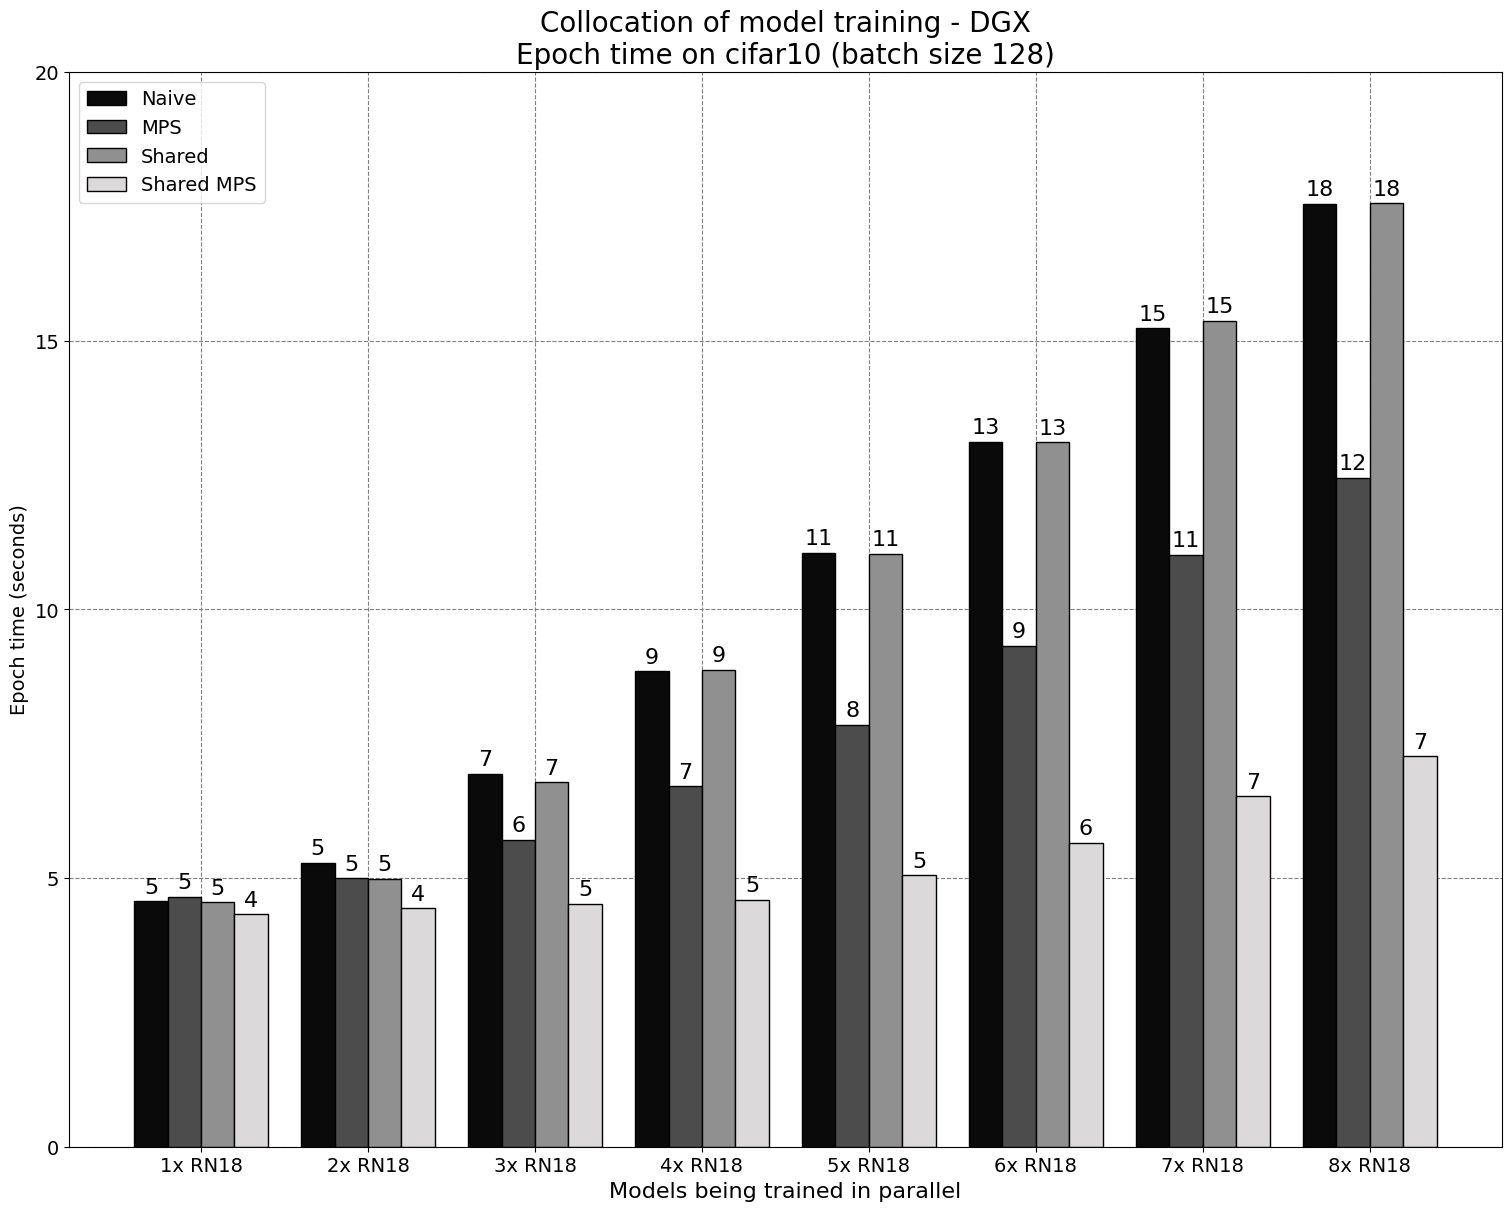

In [12]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

naive = [df.iloc[2:]["total_time"].mean() for df in [df_1x, df_2x, df_3x, df_4x, df_5x, df_6x, df_7x, df_8x]]

#naive_dali = [df.iloc[2:]["total_time"].mean() for df in [df_dali_1x, df_dali_2x, df_dali_3x, df_dali_4x]]

mps = [df.iloc[2:]["total_time"].mean() for df in [df_1x_mps, df_2x_mps, df_3x_mps, df_4x_mps, df_5x_mps, df_6x_mps, df_7x_mps, df_8x_mps]]

shared = [df.iloc[2:]["total_time"].mean() for df in [df_mul_1x, df_mul_2x, df_mul_3x, df_mul_4x, df_mul_5x, df_mul_6x, df_mul_7x, df_mul_8x]]

#shared_dali = [df.iloc[2:]["total_time"].mean() for df in [df_dali_mul_1x, df_dali_mul_2x, df_dali_mul_3x, df_dali_mul_4x]]

shared_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x_mps, df_mul_2x_mps, df_mul_3x_mps, df_mul_4x_mps, df_mul_5x_mps, df_mul_6x_mps, df_mul_7x_mps, df_mul_8x_mps]]

measurements ={
    "Naive": naive,
    #"DALI": naive_dali,
    "MPS": mps,
    "Shared": shared,
    #"Shared + DALI": shared_dali,
    "Shared MPS": shared_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 25, 5)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

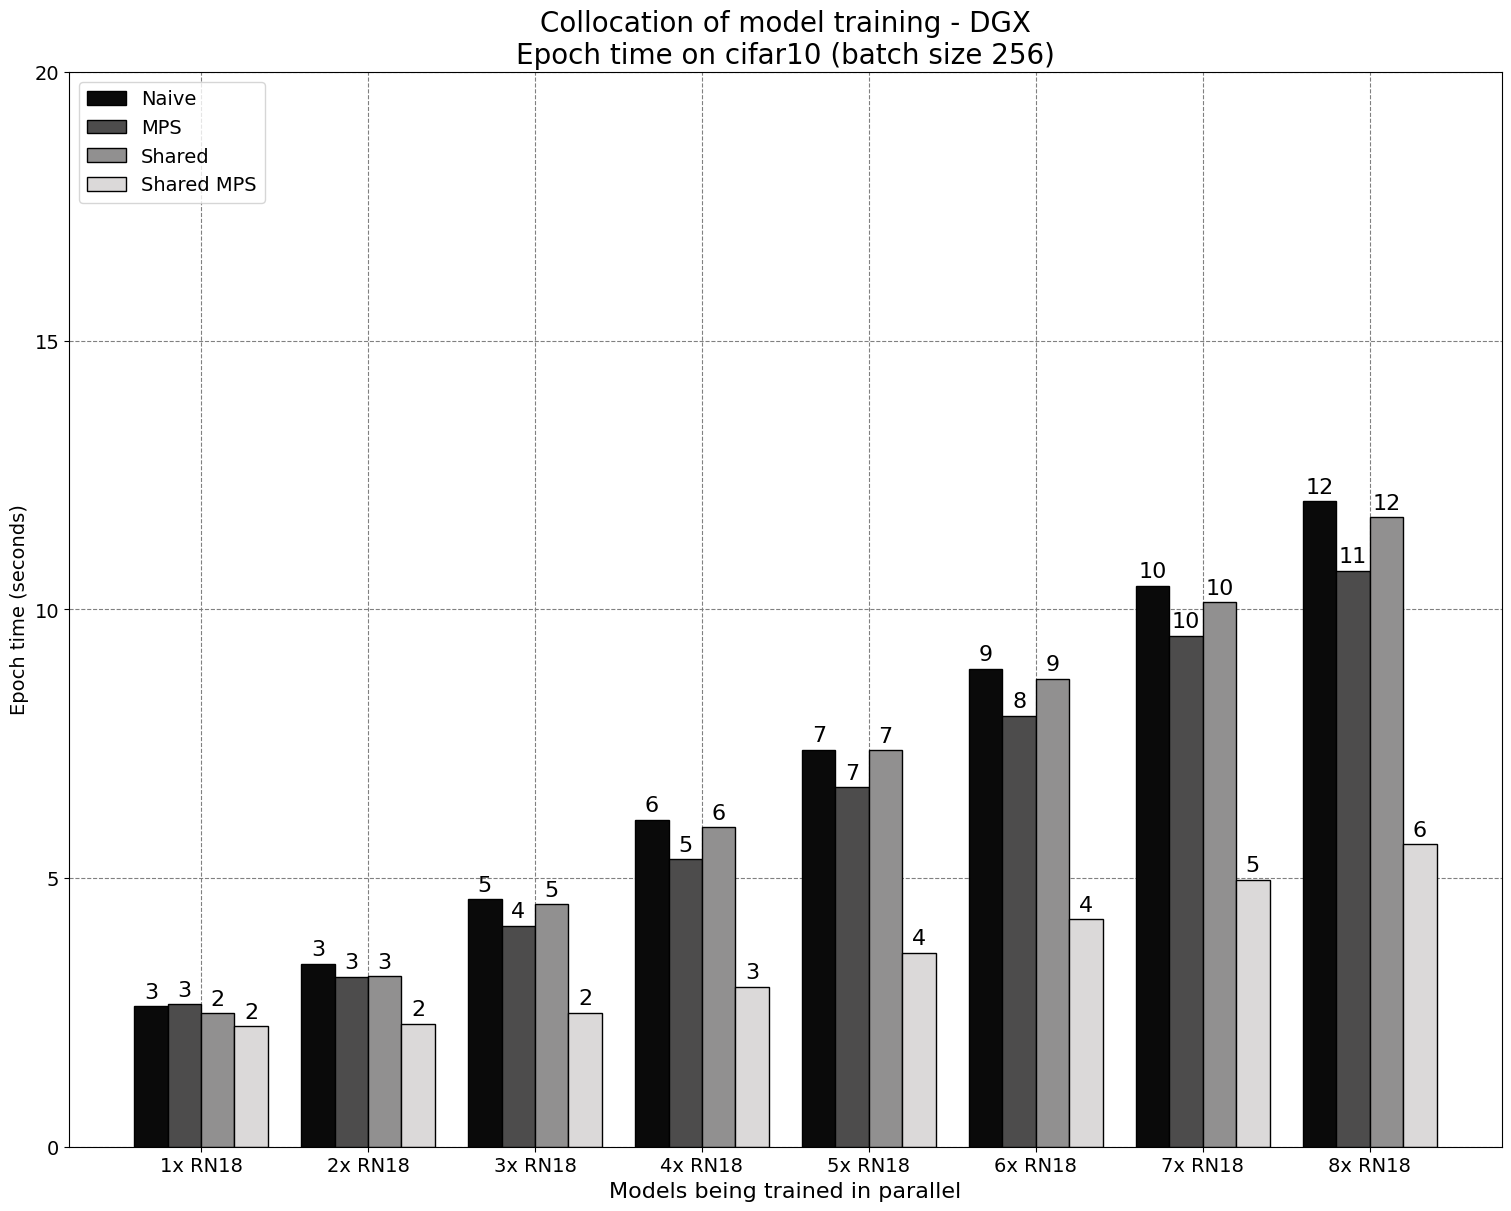

In [7]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

naive = [df.iloc[2:]["total_time"].mean() for df in [df_1x, df_2x, df_3x, df_4x, df_5x, df_6x, df_7x, df_8x]]

#naive_dali = [df.iloc[2:]["total_time"].mean() for df in [df_dali_1x, df_dali_2x, df_dali_3x, df_dali_4x]]

mps = [df.iloc[2:]["total_time"].mean() for df in [df_1x_mps, df_2x_mps, df_3x_mps, df_4x_mps, df_5x_mps, df_6x_mps, df_7x_mps, df_8x_mps]]

shared = [df.iloc[2:]["total_time"].mean() for df in [df_mul_1x, df_mul_2x, df_mul_3x, df_mul_4x, df_mul_5x, df_mul_6x, df_mul_7x, df_mul_8x]]

#shared_dali = [df.iloc[2:]["total_time"].mean() for df in [df_dali_mul_1x, df_dali_mul_2x, df_dali_mul_3x, df_dali_mul_4x]]

shared_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_1x_mps, df_mul_2x_mps, df_mul_3x_mps, df_mul_4x_mps, df_mul_5x_mps, df_mul_6x_mps, df_mul_7x_mps, df_mul_8x_mps]]

measurements ={
    "Naive": naive,
    #"DALI": naive_dali,
    "MPS": mps,
    "Shared": shared,
    #"Shared + DALI": shared_dali,
    "Shared MPS": shared_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 25, 5)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [34]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}_gpu_util.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}_gpu_util.csv")
df_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}_gpu_util.csv")
df_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}_gpu_util.csv")

# BASELINE + MPS

#df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
#df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[5]}.csv")
#df_3x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[6]}.csv")
#df_4x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[7]}.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[4]}_gpu_util.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[5]}_gpu_util.csv")
df_mul_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[6]}_gpu_util.csv")
df_mul_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[7]}_gpu_util.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[8]}_gpu_util.csv")
df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[9]}_gpu_util.csv")
df_dali_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[10]}_gpu_util.csv")
df_dali_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[11]}_gpu_util.csv")

# SHARED DATA + DALI

df_dali_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}_gpu_util.csv")
df_dali_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}_gpu_util.csv")
df_dali_mul_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}_gpu_util.csv")
df_dali_mul_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}_gpu_util.csv")

# SHARED DATA + MPS

#df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}.csv")
#df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}.csv")
#df_mul_3x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}.csv")
#df_mul_4x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}.csv")

In [35]:
dfs_single = [
    df_1x,
    df_2x,
    df_3x,
    df_4x,
    df_dali_1x,
    df_dali_2x,
    df_dali_3x,
    df_dali_4x,
]

dfs_shared = [
    df_mul_1x,
    df_mul_2x,
    df_mul_3x,
    df_mul_4x,
    df_dali_mul_1x,
    df_dali_mul_2x,
    df_dali_mul_3x,
    df_dali_mul_4x,
]

lists_single, lists_shared = [], []

for idx, df in enumerate(dfs_single):
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_single.append(mem)

for idx, df in enumerate(dfs_shared):
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_shared.append(mem)


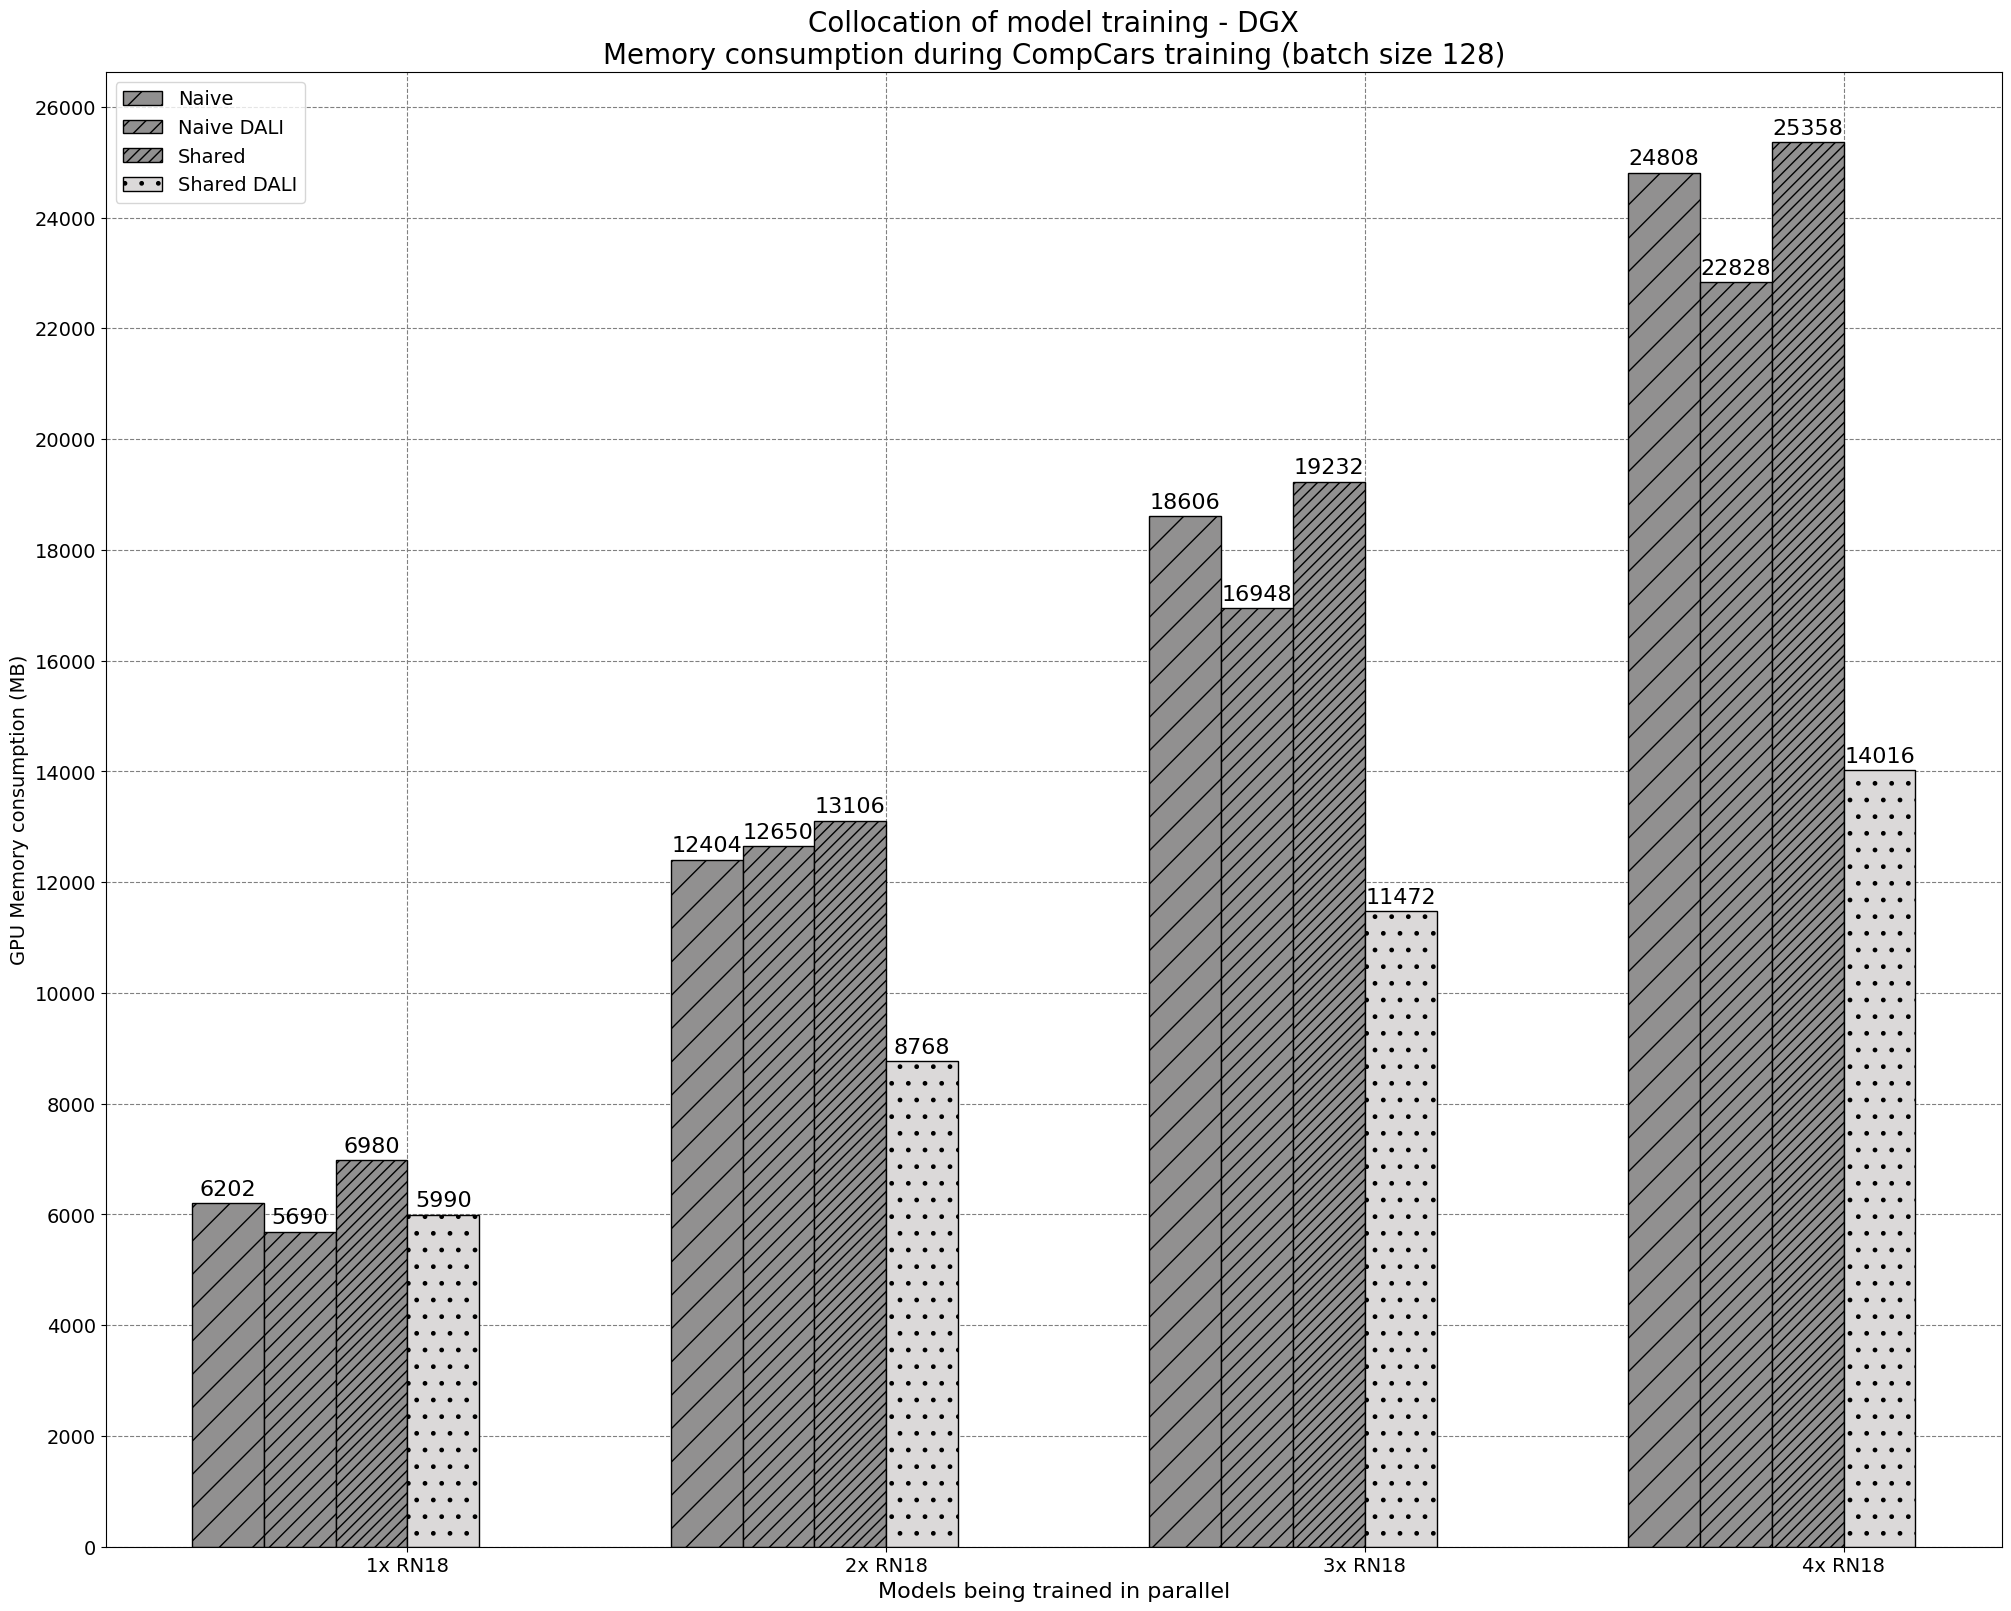

In [36]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

naive = lists_single[0:4]

naive_dali = lists_single[4:8]

shared = lists_shared[0:4]

shared_dali = lists_shared[4:8]

measurements ={
    "Naive": naive,
    "Naive DALI": naive_dali,
    #"MPS": mps,
    "Shared": shared,
    #"Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.15  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(20,16))
hatches = ["/", "//", "///", ".", "..", "..."]
hatch_cols = ["#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nMemory consumption during CompCars training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 26001, 2000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [37]:
cols = ["time", "cpu", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]

def create_plottable_df(path):
    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]

    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df['running_seconds'] = pd.to_datetime(df['time'], unit='ns')
    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

In [38]:
def plot_dfs(dfs, title, titles, metric, normalized=True):
    fig, ax = plt.subplots(figsize=(12,8))
    if normalized:
        group = 'running_seconds_normalized'
    else:
        group = 'running_seconds'
    for idx, df in enumerate(dfs):
        average_all_cpus = df.groupby(group)[metric].mean()

        plt.plot(average_all_cpus.index, average_all_cpus.values, \
                    linewidth=1, label=titles[idx])

    plt.xlabel('Running time, normalized %')
    if metric in ["%usr", "%nice"]:
        plt.ylabel('% CPU Utilization')
        plt.title(f'{title}\nCPU Usage')
    if metric == "%iowait":
        plt.ylabel('% I/O wait')
        plt.title(f'{title}\nI/O wait')
    plt.legend()
    plt.grid(True)
    plt.ylim(0,100)
    plt.show()

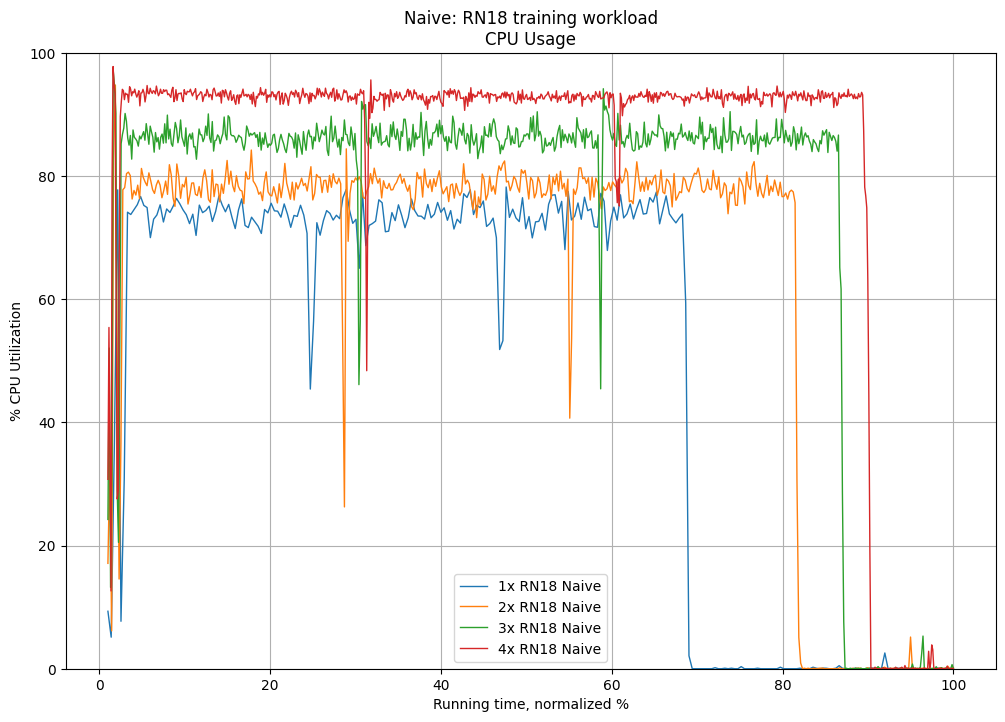

In [48]:
paths = [
    train_path / model_name / f"pid_{trace_pids[0]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[1]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[2]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
]
suptitles = [
    "1x RN18 Naive",
    "2x RN18 Naive",
    "3x RN18 Naive",
    "4x RN18 Naive",
]
title = "Naive: RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", normalized=True)

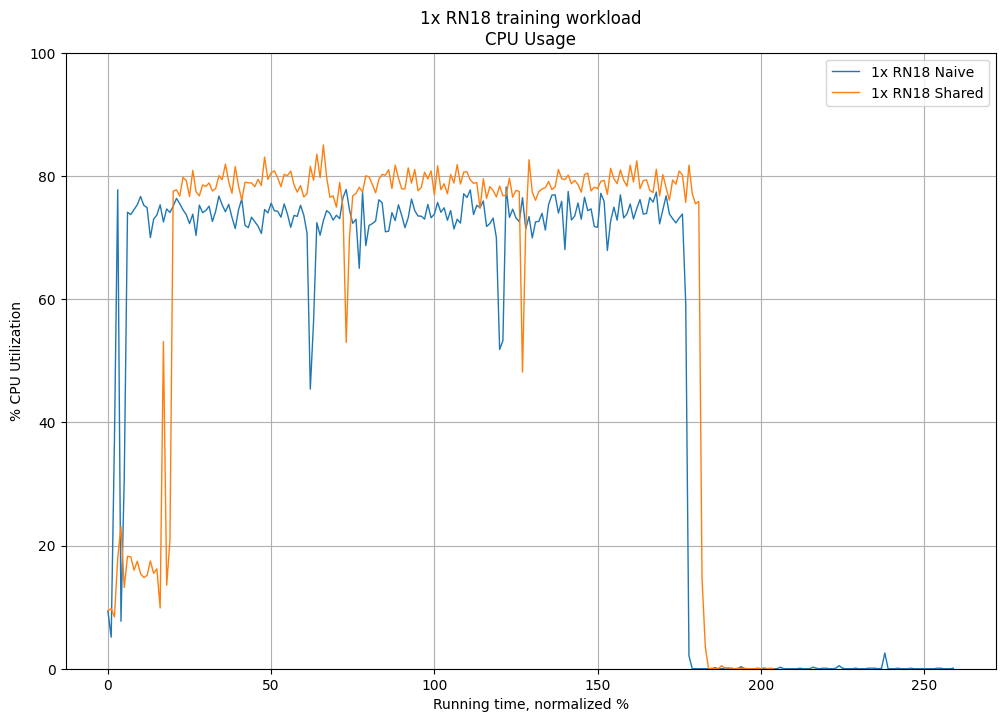

In [44]:
paths = [
    train_path / model_name / f"pid_{trace_pids[0]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[4]}_cpu.out",
]
suptitles = [
    "1x RN18 Naive",
    "1x RN18 Shared",
]
title = "1x RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", normalized=False)

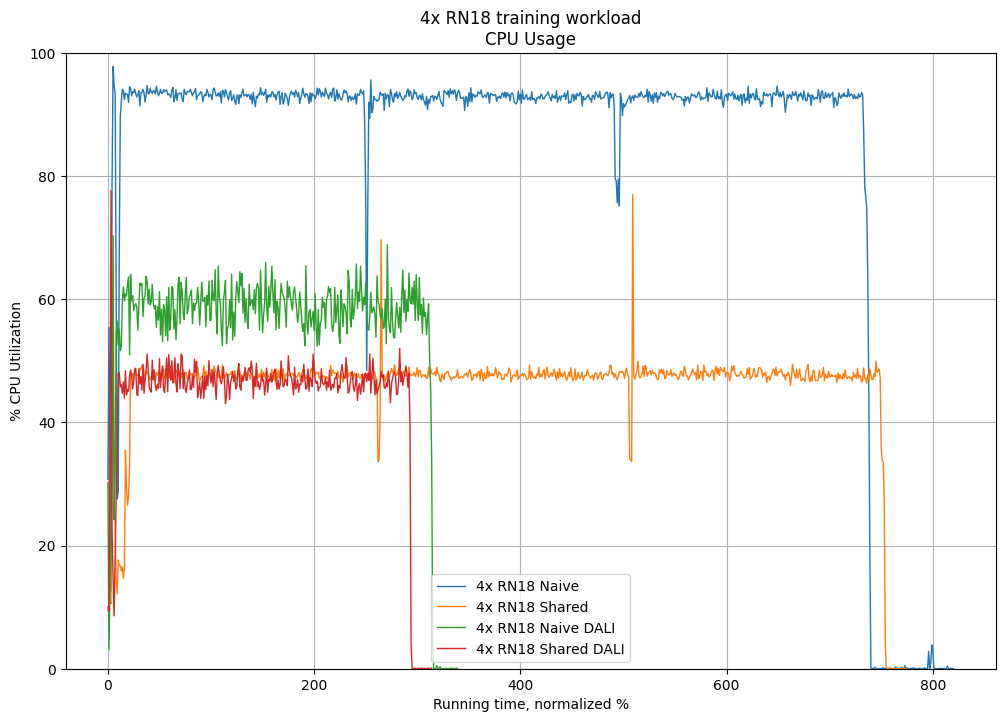

In [46]:
paths = [
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[7]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[11]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[15]}_cpu.out",
]
suptitles = [
    "4x RN18 Naive",
    "4x RN18 Shared",
    "4x RN18 Naive DALI",
    "4x RN18 Shared DALI",
]
title = "4x RN18 training workload"

dfs = [create_plottable_df(path) for path in paths]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", normalized=False)

In [ ]:
def create_plotable_df(plot_df, trace_pid, workload_type, ignore_pid=0, add_second=0):
    plot_df['date'] = pd.to_datetime(plot_df['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin') - pd.DateOffset(hours=2) + pd.DateOffset(seconds=add_second)
    plot_df['time'] = plot_df["date"].dt.time

    start_time = str(plot_df["time"].iloc[0])
    end_time = str(plot_df["time"].iloc[-2])

    trace_header = ["date", "time", "gpu", "pid", "type", "sm", "mem", "enc", "dec", "mb", "command"]
    all_lines = []

    if workload_type in ("naive", "naive_mps"):
        trace_path = train_path / model_name / f"pid_{trace_pid}_gpu.out"
    elif workload_type in ("shared", "shared_mps"):
        trace_path = train_mul_path / f"pid_{trace_pid}_gpu.out"
    
    with open(trace_path, "r") as f:
        next(f)
        next(f)
        lines = f.readlines()
        lines = [line.strip().split() for line in lines]

    start_idx, end_idx = 0, 0
    while lines[start_idx][1] != start_time:
        start_idx += 1
    while lines[end_idx][1] != end_time:
        end_idx += 1
    all_lines=lines[start_idx:end_idx+1]

    clean_lines = []

    for l in all_lines:
        if l == ['#Date', 'Time', 'gpu', 'pid', 'type', 'sm', 'mem', 'enc', 'dec', 'fb', 'command']:
            continue
        elif l == ['#YYYYMMDD', 'HH:MM:SS', 'Idx', '#', 'C/G', '%', '%', '%', '%', 'MB', 'name']:
            continue
        elif l[-1] != "nvidia-cuda-mps" and "mps" in workload_type:
            continue
        elif int(l[2]) != 0:
            continue
        elif ignore_pid == int(l[3]):
            continue
        else:
            clean_lines.append(l)

    df = pd.DataFrame(clean_lines, columns=trace_header)

    df["sm"] = df["sm"].replace({"-": 0})
    df["mem"] = df["mem"].replace({"-": 0})

    df['sm'] = df['sm'].astype(int)
    df['mem'] = df['mem'].astype(int)

    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df['time_diff'] = (df['datetime'] - df['datetime'][0]).dt.total_seconds()

    return df

In [ ]:
def plot_heatmap(df, value="sm", title=""):
    max_val = df.iloc[-1]["time_diff"]

    plt.figure(figsize=(15,12))
    heatmap_data = df.pivot_table(index='time_diff', columns='pid', values=value)

    # Create a heatmap plot using seaborn
    ax = sns.heatmap(heatmap_data, cmap='gray_r', vmax=100,
                    yticklabels=[i if i % 25 == 0 else None for i in range(0, int(max_val))])
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    # Add labels and title to the plot
    plt.xlabel('PID')
    plt.ylabel('Time (seconds)')
    #ax.set_yticks([float(i) for i in range(0, 251, 25)])
    ax.set_title(title + f"\n{value.upper()} %-utilization for each process over time", size=12)

    # Show the plot
    plt.show()

In [ ]:
def plot_timeseries(df, value, title):
    fig, ax = plt.subplots(figsize=(12,8))

    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    df['time_diff'] = (df['datetime'] - df['datetime'][0]).dt.total_seconds()

    groups = df.groupby('pid')

    for pid, group in groups:
        l1 = f'PID {pid} {value.upper()} %'
        h1 = group.plot(kind='line', x='time_diff', y=value, ax=ax, label=l1)
        #ax.get_legend().remove()

        l2 = 'PID {} MEM %'.format(pid)
        h2 = group.plot(kind='line', x='time_diff', y='mem', ax=ax, color='r', label=l2)
        #ax2.get_legend().remove()

    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Utilization %')
    ax.set_title(title, fontsize=12)
    plt.yticks([i for i in range(0, 101, 20)], fontsize=7)

    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    plt.show()

In [ ]:
titles = [
    "Naive, 1x RN18, BS 128, g5.xlarge",
    "MPS, 1x RN18, BS 128, g5.xlarge",
    "Shared, 1x RN18, BS 128, g5.xlarge",
    "Shared + MPS, 1x RN18, 128, g5.xlarge"
]
ignore_pids = [0, 0, 46779, 0]
add_seconds = [0, 0, 0, 0]
workload_types = ["naive", "naive_mps", "shared", "shared_mps"]
trace_pids_1x = [trace_pids[0], trace_pids[4], trace_pids[8], trace_pids[12]]
for idx, df in enumerate([df_1x, df_1x_mps, df_mul_1x, df_mul_1x_mps]):

    plot_df = create_plotable_df(df, trace_pids_1x[idx], workload_types[idx], ignore_pid=ignore_pids[idx], add_second=add_seconds[idx])
    plot_timeseries(plot_df, "sm", titles[idx])

    #plot_heatmap(plot_df, "sm")
    #plot_heatmap(plot_df, "mem")
    

In [ ]:
titles = [
    "Naive, 2x RN18, BS 128, g5.xlarge",
    "MPS, 2x RN18, BS 128, g5.xlarge",
    "Shared, 2x RN18, BS 128, g5.xlarge",
    "Shared + MPS, 2x RN18, BS 128, g5.xlarge"
]
ignore_pids = [0, 0, 47048, 0]
add_seconds = [0, 0, 0, 0]
workload_types = ["naive", "naive_mps", "shared", "shared_mps"]
trace_pids_2x = [trace_pids[1], trace_pids[5], trace_pids[9], trace_pids[13]]
for idx, df in enumerate([df_2x, df_2x_mps, df_mul_2x, df_mul_2x_mps]):

    plot_df = create_plotable_df(df, trace_pids_2x[idx], workload_types[idx], ignore_pid=ignore_pids[idx], add_second=add_seconds[idx])
    plot_timeseries(plot_df, "sm", titles[idx])

    plot_heatmap(plot_df, "sm", titles[idx])
    plot_heatmap(plot_df, "mem", titles[idx])
    

In [ ]:
titles = [
    "Naive, 4x RN18, BS 128, g5.xlarge",
    "MPS, 4x RN18, BS 128, g5.xlarge",
    "Shared, 4x RN18, BS 128, g5.xlarge",
    "Shared + MPS, 4x RN18, BS 128, g5.xlarge"
]
ignore_pids = [0, 0, 47744, 0]
add_seconds = [0, 0, 0, 0]
workload_types = ["naive", "naive_mps", "shared", "shared_mps"]
trace_pids_4x = [trace_pids[3], trace_pids[7], trace_pids[11], trace_pids[15]]
for idx, df in enumerate([df_4x, df_4x_mps, df_mul_4x, df_mul_4x_mps]):

    plot_df = create_plotable_df(df, trace_pids_4x[idx], workload_types[idx], ignore_pid=ignore_pids[idx], add_second=add_seconds[idx])
    plot_timeseries(plot_df, "sm", titles[idx])

    plot_heatmap(plot_df, "sm", titles[idx])
    plot_heatmap(plot_df, "mem", titles[idx])
    